# MSSV: 21127666
# Họ và tên: Trần Thuận Phát

## Import the required libraries

In [1]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers import Dense, Dropout, Activation   
from keras import utils                     

## Load the Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
test_data = pd.read_csv('data_mnist/test.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 784)])

We load the dataset and verify the dimensions of the training and testing sets.

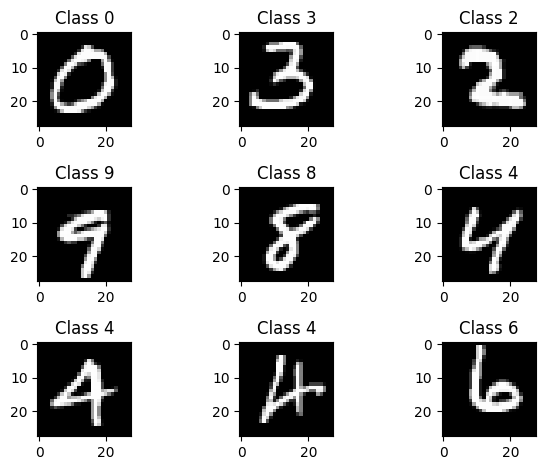

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

## Data Preprocessing

In [5]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


# Convert to one-hot encoding

In [6]:
no_classes = 10

Y_train = utils.to_categorical(y_train, no_classes)
Y_test = utils.to_categorical(y_test, no_classes)

## One Layer And 100 Nodes 

In [7]:
model_1_layer_100_nodes = Sequential()
model_1_layer_100_nodes.add(Dense(100, input_shape=(784,))) 
model_1_layer_100_nodes.add(Activation('relu'))
model_1_layer_100_nodes.add(Dropout(0.2))
model_1_layer_100_nodes.add(Dense(10))
model_1_layer_100_nodes.add(Activation('softmax'))
model_1_layer_100_nodes.summary()
model_1_layer_100_nodes.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_1_layer_100_nodes = model_1_layer_100_nodes.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1/10


469

## Evaluate the model

In [8]:
loss, accuracy = model_1_layer_100_nodes.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.9764999747276306


Plot the accuracy and loss metrics of the model.

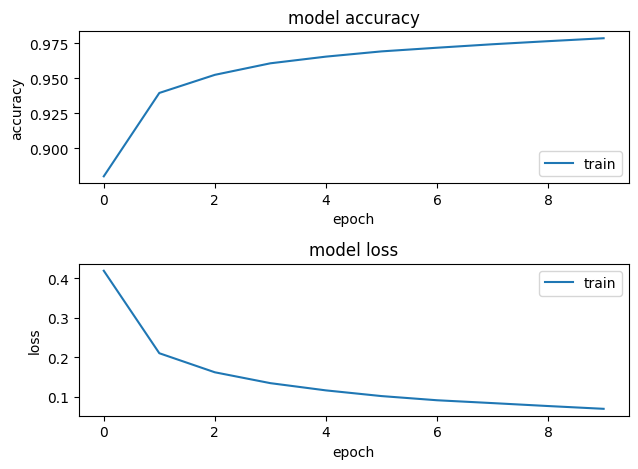

In [9]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_1_layer_100_nodes.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_1_layer_100_nodes.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [10]:
predicted_classes = model_1_layer_100_nodes.predict(X_test)
predicted_classes = [np.argmax(softmaxArray) for softmaxArray in predicted_classes]
Y_True = [np.argmax(softmaxArray) for softmaxArray in Y_test]

correct_indices = np.where(np.array(predicted_classes) == np.array(Y_True))[0]
incorrect_indices = np.where(np.array(predicted_classes) != np.array(Y_True))[0]

313/313 [==============================] - 0s 875us/step


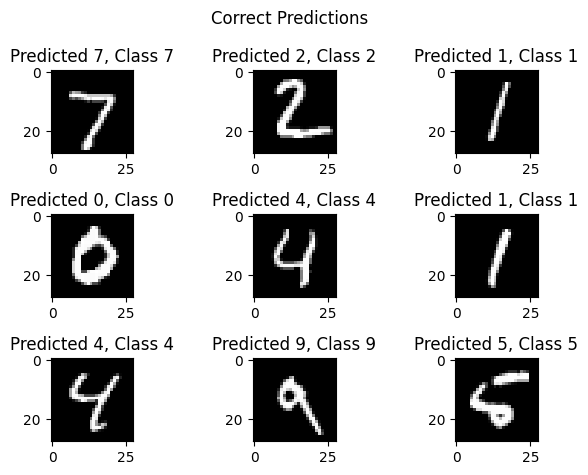

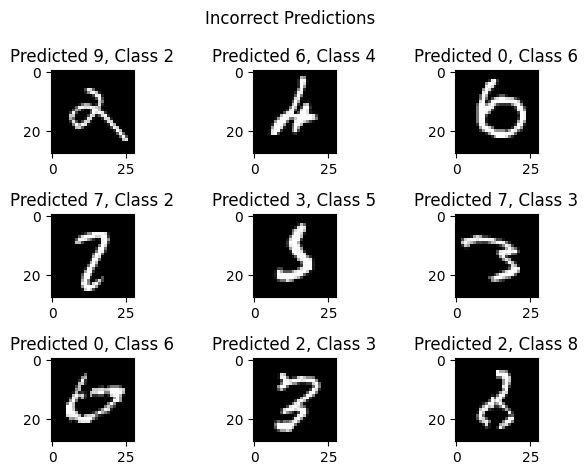

In [11]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.suptitle("Correct Predictions")  
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.suptitle("Incorrect Predictions")
plt.tight_layout()

## One Layer And 300 Nodes 

In [12]:
model_1_layer_300_nodes = Sequential()
model_1_layer_300_nodes.add(Dense(300, input_shape=(784,))) 
model_1_layer_300_nodes.add(Activation('relu'))
model_1_layer_300_nodes.add(Dropout(0.2))
model_1_layer_300_nodes.add(Dense(10))
model_1_layer_300_nodes.add(Activation('softmax'))
model_1_layer_300_nodes.summary()
model_1_layer_300_nodes.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_1_layer_300_nodes = model_1_layer_300_nodes.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 activation_2 (Activation)   (None, 300)               0         
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469

## Evaluate the model

In [13]:
loss, accuracy = model_1_layer_300_nodes.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.9815000295639038


Plot the accuracy and loss metrics of the model.

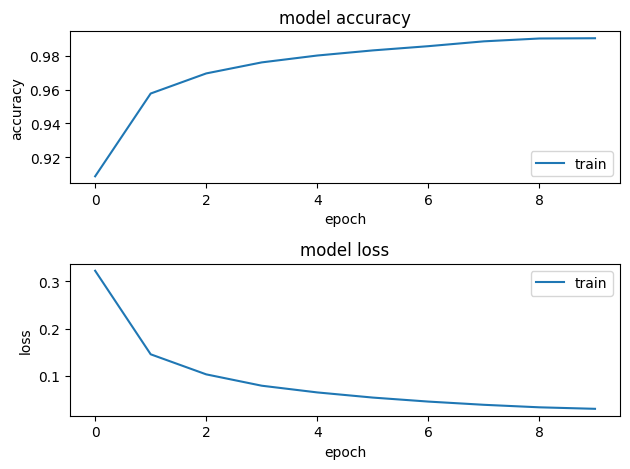

In [14]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_1_layer_300_nodes.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_1_layer_300_nodes.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [15]:
predicted_classes = model_1_layer_300_nodes.predict(X_test)
predicted_classes = [np.argmax(softmaxArray) for softmaxArray in predicted_classes]
Y_True = [np.argmax(softmaxArray) for softmaxArray in Y_test]

correct_indices = np.where(np.array(predicted_classes) == np.array(Y_True))[0]
incorrect_indices = np.where(np.array(predicted_classes) != np.array(Y_True))[0]

313/313 [==============================] - 0s 959us/step


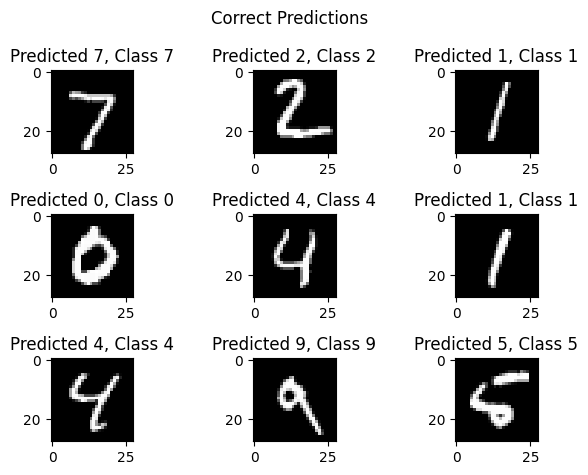

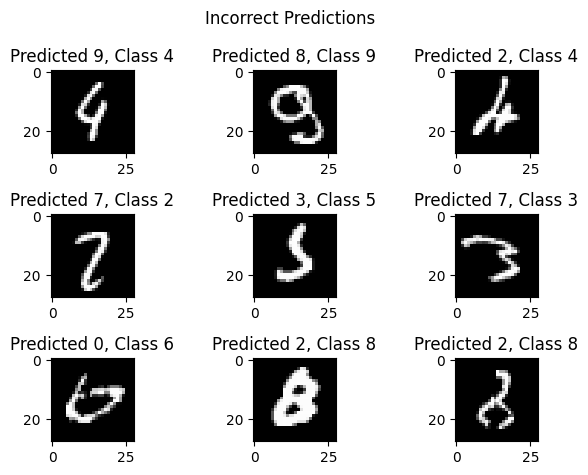

In [16]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.suptitle("Correct Predictions")  
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.suptitle("Incorrect Predictions")
plt.tight_layout()

## One Layer And 500 Nodes 

In [17]:
model_1_layer_500_nodes = Sequential()
model_1_layer_500_nodes.add(Dense(500, input_shape=(784,))) 
model_1_layer_500_nodes.add(Activation('relu'))
model_1_layer_500_nodes.add(Dropout(0.2))
model_1_layer_500_nodes.add(Dense(10))
model_1_layer_500_nodes.add(Activation('softmax'))
model_1_layer_500_nodes.summary()
model_1_layer_500_nodes.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_1_layer_500_nodes = model_1_layer_500_nodes.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 activation_4 (Activation)   (None, 500)               0         
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5010      
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 397510 (1.52 MB)
Trainable params: 397510 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469

## Evaluate the model

In [18]:
loss, accuracy = model_1_layer_500_nodes.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.9830999970436096


Plot the accuracy and loss metrics of the model.

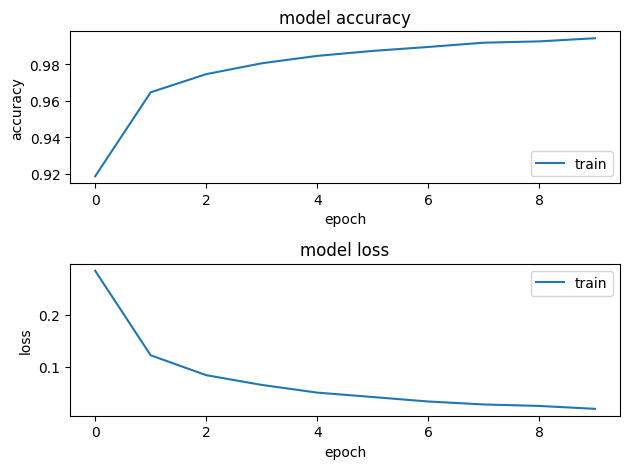

In [19]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_1_layer_500_nodes.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_1_layer_500_nodes.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [20]:
predicted_classes = model_1_layer_500_nodes.predict(X_test)
predicted_classes = [np.argmax(softmaxArray) for softmaxArray in predicted_classes]
Y_True = [np.argmax(softmaxArray) for softmaxArray in Y_test]

correct_indices = np.where(np.array(predicted_classes) == np.array(Y_True))[0]
incorrect_indices = np.where(np.array(predicted_classes) != np.array(Y_True))[0]

313/313 [==============================] - 0s 1ms/step


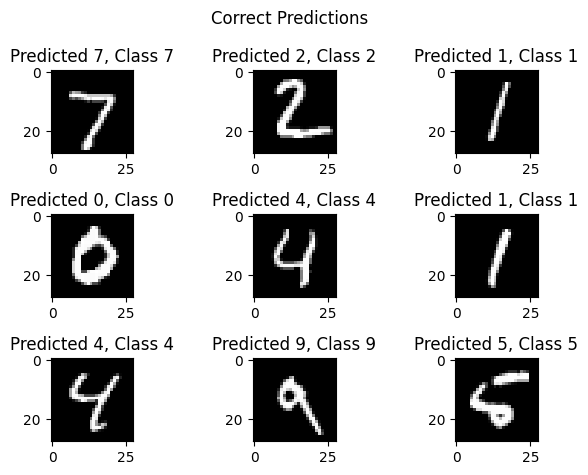

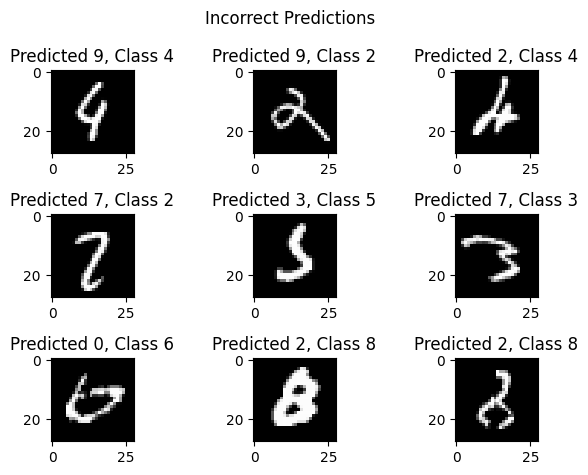

In [21]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.suptitle("Correct Predictions")  
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.suptitle("Incorrect Predictions")
plt.tight_layout()

## Two Layer And 100 Nodes 

In [22]:
model_2_layer_100_nodes = Sequential()
model_2_layer_100_nodes.add(Dense(100, input_shape=(784,))) 
model_2_layer_100_nodes.add(Activation('relu'))
model_2_layer_100_nodes.add(Dropout(0.2))
model_2_layer_100_nodes.add(Dense(100, input_shape=(784,))) 
model_2_layer_100_nodes.add(Activation('relu'))
model_2_layer_100_nodes.add(Dropout(0.2))
model_2_layer_100_nodes.add(Dense(10))
model_2_layer_100_nodes.add(Activation('softmax'))
model_2_layer_100_nodes.summary()
model_2_layer_100_nodes.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2_layer_100_nodes = model_2_layer_100_nodes.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 activation_6 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 activation_7 (Activation)   (None, 100)               0         
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

## Evaluate the model

In [23]:
loss, accuracy = model_2_layer_100_nodes.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.9785000085830688


Plot the accuracy and loss metrics of the model.

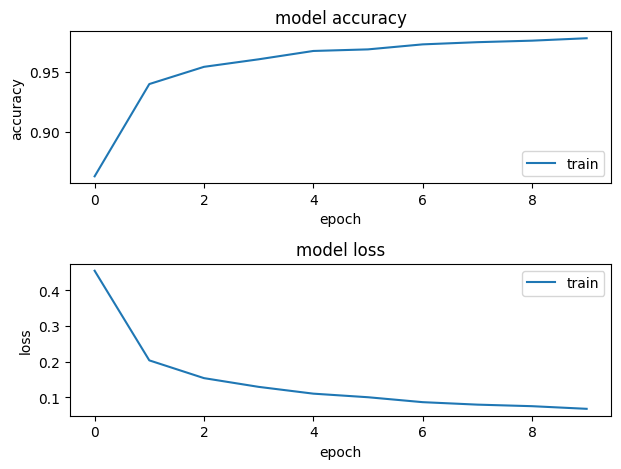

In [24]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_2_layer_100_nodes.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_2_layer_100_nodes.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [25]:
predicted_classes = model_2_layer_100_nodes.predict(X_test)
predicted_classes = [np.argmax(softmaxArray) for softmaxArray in predicted_classes]
Y_True = [np.argmax(softmaxArray) for softmaxArray in Y_test]

correct_indices = np.where(np.array(predicted_classes) == np.array(Y_True))[0]
incorrect_indices = np.where(np.array(predicted_classes) != np.array(Y_True))[0]

313/313 [==============================] - 0s 817us/step


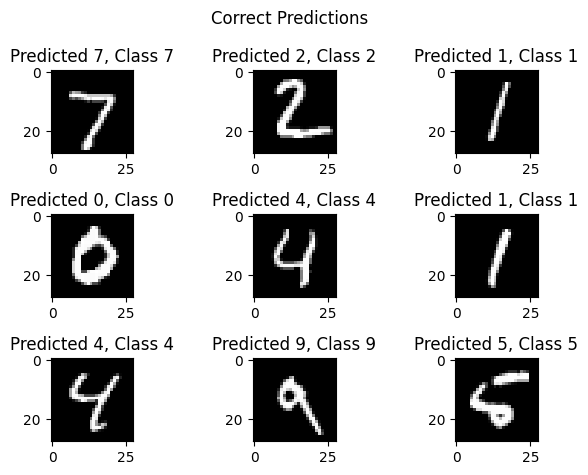

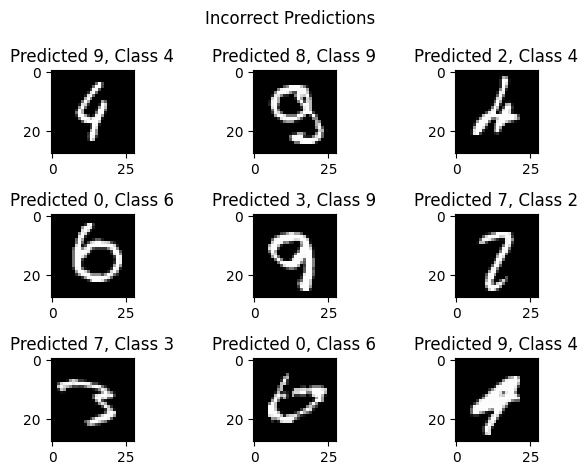

In [26]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.suptitle("Correct Predictions")  
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.suptitle("Incorrect Predictions")
plt.tight_layout()

## Two Layer And 300 Nodes 

In [27]:
model_2_layer_300_nodes = Sequential()
model_2_layer_300_nodes.add(Dense(300, input_shape=(784,))) 
model_2_layer_300_nodes.add(Activation('relu'))
model_2_layer_300_nodes.add(Dropout(0.2))
model_2_layer_300_nodes.add(Dense(300, input_shape=(784,))) 
model_2_layer_300_nodes.add(Activation('relu'))
model_2_layer_300_nodes.add(Dropout(0.2))
model_2_layer_300_nodes.add(Dense(10))
model_2_layer_300_nodes.add(Activation('softmax'))
model_2_layer_300_nodes.summary()
model_2_layer_300_nodes.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2_layer_300_nodes = model_2_layer_300_nodes.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 activation_9 (Activation)   (None, 300)               0         
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               90300     
                                                                 
 activation_10 (Activation)  (None, 300)               0         
                                                                 
 dropout_6 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

## Evaluate the model

In [28]:
loss, accuracy = model_2_layer_300_nodes.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.9807000160217285


Plot the accuracy and loss metrics of the model.

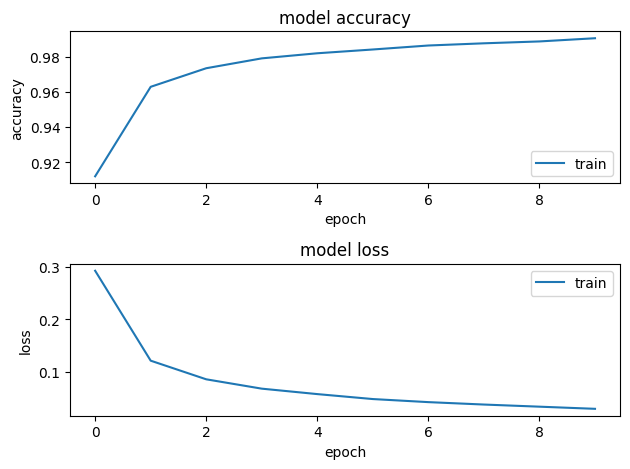

In [29]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_2_layer_300_nodes.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_2_layer_300_nodes.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [30]:
predicted_classes = model_2_layer_300_nodes.predict(X_test)
predicted_classes = [np.argmax(softmaxArray) for softmaxArray in predicted_classes]
Y_True = [np.argmax(softmaxArray) for softmaxArray in Y_test]

correct_indices = np.where(np.array(predicted_classes) == np.array(Y_True))[0]
incorrect_indices = np.where(np.array(predicted_classes) != np.array(Y_True))[0]

313/313 [==============================] - 0s 1ms/step


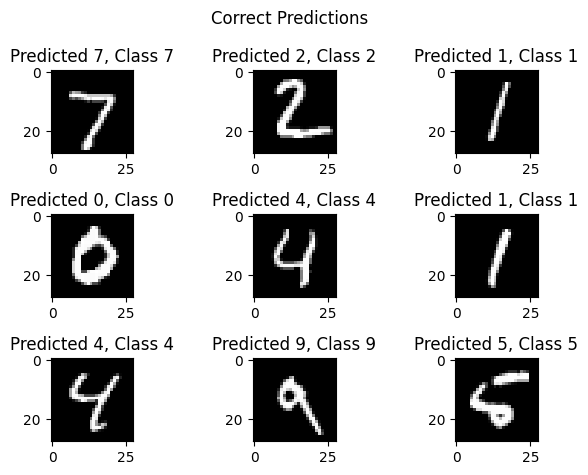

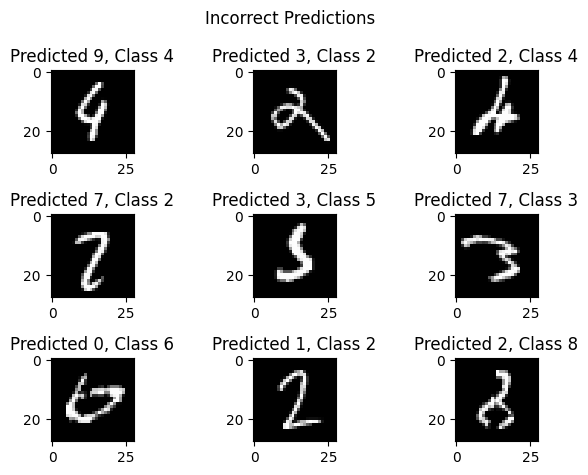

In [31]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.suptitle("Correct Predictions")  
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.suptitle("Incorrect Predictions")
plt.tight_layout()

## Two Layer And 500 Nodes 

In [32]:
model_2_layer_500_nodes = Sequential()
model_2_layer_500_nodes.add(Dense(500, input_shape=(784,))) 
model_2_layer_500_nodes.add(Activation('relu'))
model_2_layer_500_nodes.add(Dropout(0.2))
model_2_layer_500_nodes.add(Dense(500, input_shape=(784,))) 
model_2_layer_500_nodes.add(Activation('relu'))
model_2_layer_500_nodes.add(Dropout(0.2))
model_2_layer_500_nodes.add(Dense(10))
model_2_layer_500_nodes.add(Activation('softmax'))
model_2_layer_500_nodes.summary()
model_2_layer_500_nodes.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2_layer_500_nodes = model_2_layer_500_nodes.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               392500    
                                                                 
 activation_12 (Activation)  (None, 500)               0         
                                                                 
 dropout_7 (Dropout)         (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 500)               250500    
                                                                 
 activation_13 (Activation)  (None, 500)               0         
                                                                 
 dropout_8 (Dropout)         (None, 500)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               

## Evaluate the model

In [33]:
loss, accuracy = model_2_layer_500_nodes.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.98089998960495


Plot the accuracy and loss metrics of the model.

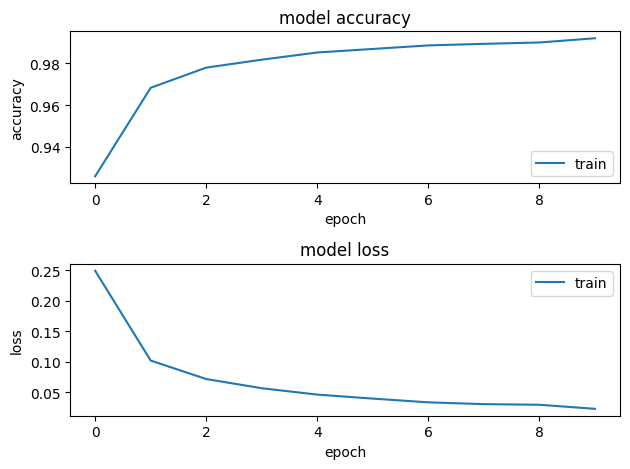

In [34]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_2_layer_500_nodes.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_2_layer_500_nodes.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [35]:
predicted_classes = model_2_layer_500_nodes.predict(X_test)
predicted_classes = [np.argmax(softmaxArray) for softmaxArray in predicted_classes]
Y_True = [np.argmax(softmaxArray) for softmaxArray in Y_test]

correct_indices = np.where(np.array(predicted_classes) == np.array(Y_True))[0]
incorrect_indices = np.where(np.array(predicted_classes) != np.array(Y_True))[0]

313/313 [==============================] - 1s 2ms/step


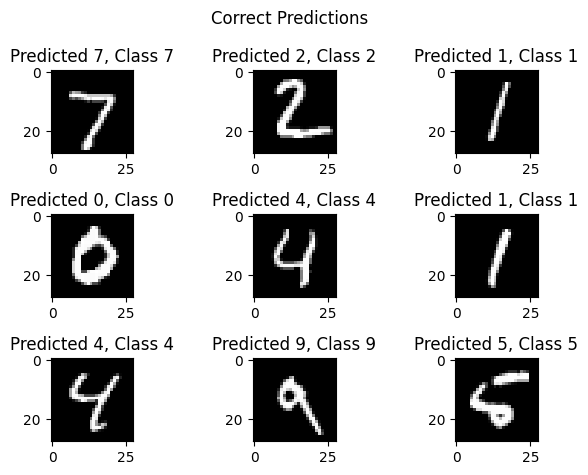

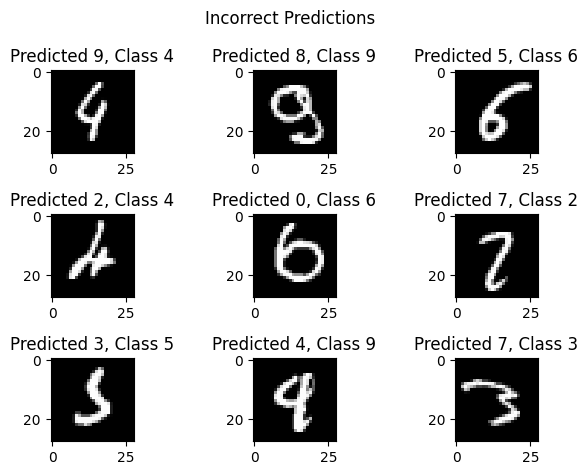

In [36]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.suptitle("Correct Predictions")  
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.suptitle("Incorrect Predictions")
plt.tight_layout()